In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
import datetime

In [2]:
def load_logs():
    df = pd.read_csv("joe_logs.csv")
    # Update the date from UTC to local time
    df["date"] = (
        pd.to_datetime(df["date"], utc=True)
        .dt.tz_convert("Europe/Paris")
        .dt.tz_localize(None)
    )
    return df[6:]


try:
    df = load_logs()
    latest_date = df["date"].max()
except:
    latest_date = datetime.datetime.min

if latest_date < datetime.datetime.now() - datetime.timedelta(minutes=10):
    print("Fetching new logs")
    assert os.system("scp degen-farming:degen-farming-bots/joe_logs.csv joe_logs.csv") == 0
    df = load_logs()

Fetching new logs


In [3]:
df["wallet_balance_usd"] = (
    df["wallet_balance_x"]
    + df["wallet_balance_y"]
    + df["joe_sum_x"]
    + df["joe_sum_y"]
    + df["joe_pending_rewards_usd"]
    + df["avax_pending_rewards_usd"]
)

In [4]:
latest = df.iloc[-1]

print(f"Latest log: {latest['date']}")
print(f"Operator ({latest['operator_address']}): {latest['operator_balance']} ETH")
print(f"Wallet ({latest['wallet_address']})")
print(f"Rewarded range: ({int(latest['joe_rewarder_start_id'], 16)} - {int(latest['joe_rewarder_end_id'], 16)})")
print(
    f"Wallet balance: {latest['wallet_balance_x']:.2f} USDC, {latest['wallet_balance_y']:.2f} USDT"
)
print(f"Joe balance: {latest['joe_sum_x']:.2f} USDC, {latest['joe_sum_y']:.2f} USDT")
print(
    f"Pending rewards: {latest['joe_pending_rewards']:.2f} JOE, {latest['avax_pending_rewards']:.2f} avax"
)
print(
    f"Pending rewards: {latest['joe_pending_rewards_usd'] + latest['avax_pending_rewards_usd']:.2f} USD"
)

joe_apr = latest["joe_reward_usd_per_year"] * 100 / latest["wallet_balance_usd"]
avax_apr = latest["avax_reward_usd_per_year"] * 100 / latest["wallet_balance_usd"]

print(
    f"APR: {joe_apr:.2f}% JOE, {avax_apr:.2f}% avax, {joe_apr + avax_apr:.2f}% total")
print(f"Wallet: ${latest['wallet_balance_usd']:.2f}")

start_date = df.iloc[0]["date"]
start_balance = 100_044.182018

delta_time = latest["date"] - start_date
delta_balance = latest["wallet_balance_usd"] - start_balance

print(f"\nOverall performance:")
print(f"Running for {delta_time.days} days {delta_time.seconds // 3600} hours {delta_time.seconds % 3600 // 60} minutes")
print(f"Balance change: ${delta_balance:.2f}")
print(f"APR: {(delta_balance / start_balance) / (delta_time.total_seconds() / 31536000) * 100:.2f}%")

Latest log: 2024-10-09 16:20:04.142981596
Operator (0xdd057c18456bb2ccff113def8c5e3ba210d6a9b4): 1.9704602950880747 ETH
Wallet (0xdded5bd58d4a1e57b2d53a344a7b9e18a88012f9)
Rewarded range: (8388600 - 8388600)
Wallet balance: 26.53 USDC, 0.00 USDT
Joe balance: 21580.58 USDC, 83858.28 USDT
Pending rewards: 0.00 JOE, 0.21 avax
Pending rewards: 5.32 USD
APR: 0.00% JOE, 133.38% avax, 133.38% total
Wallet: $105470.71

Overall performance:
Running for 92 days 15 hours 50 minutes
Balance change: $5426.52
APR: 21.37%


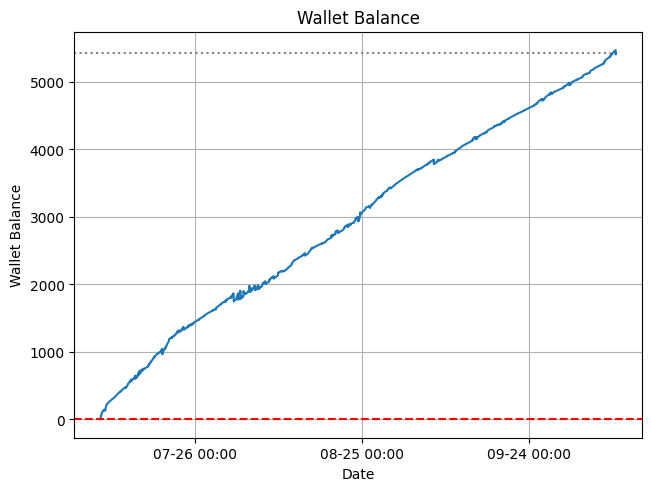

In [5]:
date = df["date"]
wallet_balance_usd = df["wallet_balance_usd"] - start_balance

fig, ax = plt.subplots(1, 1, constrained_layout=True)
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%m-%d %H:%M"))

# Plot the data
ax.plot(
    date,
    wallet_balance_usd,
    label="Wallet Balance",
)
ax.set_title("Wallet Balance")
ax.set_xlabel("Date")
ax.set_ylabel("Wallet Balance")
ax.grid(True)

ax.axhline(y=wallet_balance_usd.iloc[-1], xmax=0.95, linestyle=":", color="gray")
ax.axhline(y=0, xmax=1, linestyle="--", color="red")

ax.xaxis.set_major_locator(plt.MaxNLocator(4))

plt.show()

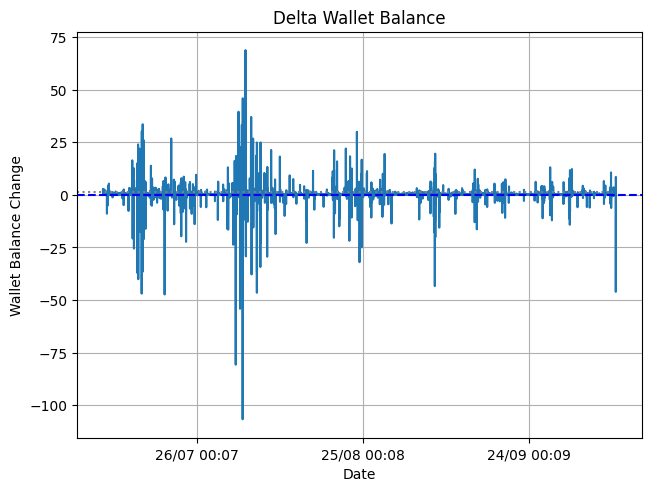

In [6]:
date = df["date"]
delta_wallet_balance_usd = df["wallet_balance_usd"] - df["wallet_balance_usd"].shift(1)

fig, ax = plt.subplots(1, 1, constrained_layout=True)
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d/%m %H:%m"))

# Plot the data
ax.plot(date, delta_wallet_balance_usd)
ax.set_title("Delta Wallet Balance")
ax.set_xlabel("Date")
ax.set_ylabel("Wallet Balance Change")

# Add block dot line at 1
ax.axhline(y=0, color="b", linestyle="--", label="0")
ax.axhline(y=delta_wallet_balance_usd.iloc[-1], xmax=0.95, linestyle=":", color="gray")

ax.grid(True)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

plt.show()

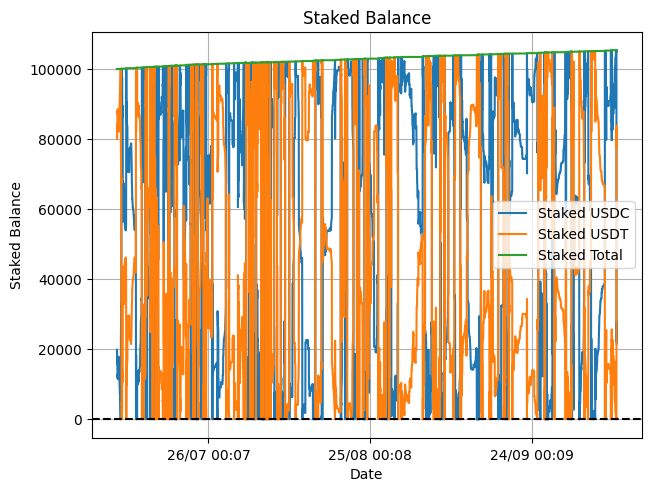

In [7]:
date = df["date"]
staked_usdc = df["joe_sum_x"]
staked_usdt = df["joe_sum_y"]
staked_total = staked_usdc + staked_usdt

fig, ax = plt.subplots(1, 1, constrained_layout=True)
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d/%m %H:%m"))

# Plot the data
ax.plot(date, staked_usdc, label="Staked USDC")
ax.plot(date, staked_usdt, label="Staked USDT")
ax.plot(date, staked_total, label="Staked Total")
ax.set_title("Staked Balance")
ax.set_xlabel("Date")
ax.set_ylabel("Staked Balance")
ax.grid(True)

ax.xaxis.set_major_locator(plt.MaxNLocator(4))

ax.axhline(y=0, color="black", linestyle="--")

plt.legend()
plt.show()

In [8]:
nb = 10 * 24 * 3

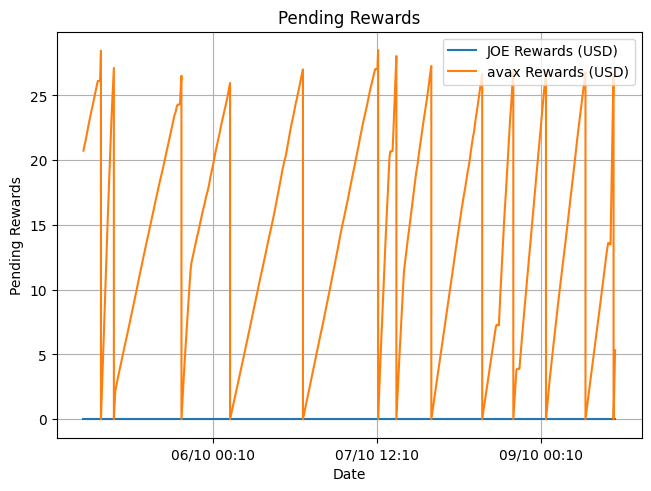

In [9]:
date = df["date"][-nb:]
joe_reward_usd = df["joe_pending_rewards_usd"][-nb:]
avax_reward_usd = df["avax_pending_rewards_usd"][-nb:]

fig, ax = plt.subplots(1, 1, constrained_layout=True)
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d/%m %H:%m"))

# Plot the data
ax.plot(date, joe_reward_usd, label="JOE Rewards (USD)")
ax.plot(date, avax_reward_usd, label="avax Rewards (USD)")
ax.set_title("Pending Rewards")
ax.set_xlabel("Date")
ax.set_ylabel("Pending Rewards")

ax.grid(True)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

plt.legend()
plt.show()

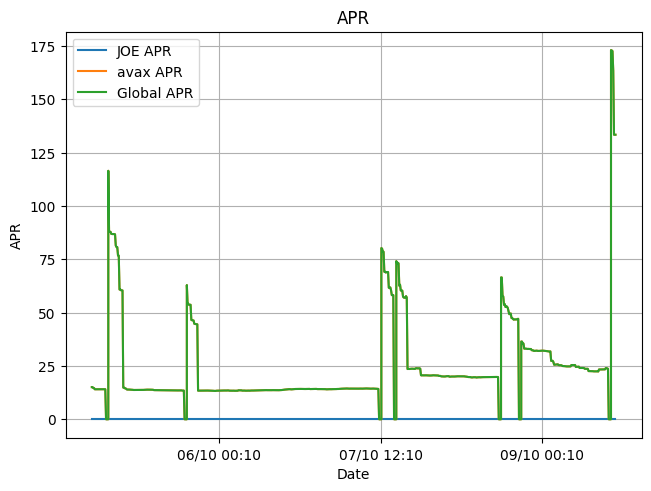

In [10]:
date = df["date"]
joe_apr = df["joe_reward_usd_per_year"] * 100 / df["wallet_balance_usd"]
avax_apr = df["avax_reward_usd_per_year"] * 100 / df["wallet_balance_usd"]
in_range = ((df["joe_staked_start_id"] >= df["joe_rewarder_start_id"]) & (df["joe_staked_end_id"] <= df["joe_rewarder_end_id"]))

joe_apr[~in_range] = 0
avax_apr[~in_range] = 0

global_apr = joe_apr + avax_apr

fig, ax = plt.subplots(1, 1, constrained_layout=True)
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d/%m %H:%m"))

# Plot the data
ax.plot(date[-nb:], joe_apr[-nb:], label="JOE APR")
ax.plot(date[-nb:], avax_apr[-nb:], label="avax APR")
ax.plot(date[-nb:], global_apr[-nb:], label="Global APR")
ax.set_title("APR")
ax.set_xlabel("Date")
ax.set_ylabel("APR")

ax.grid(True)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

plt.legend()
plt.show()

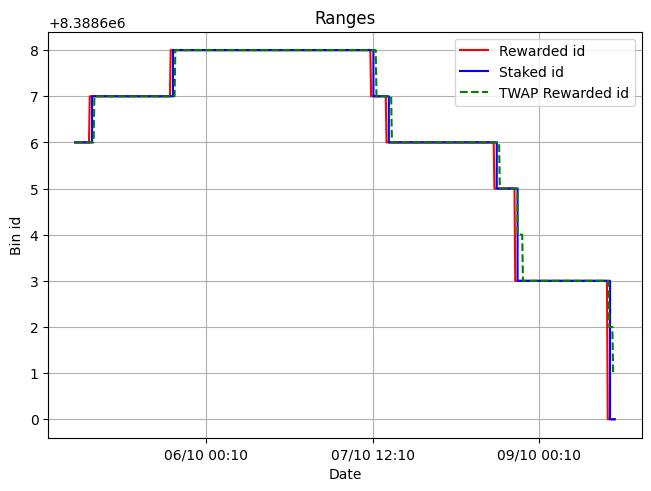

In [11]:
date = df["date"][-nb:]
rewarder_start = df["joe_rewarder_start_id"].apply(lambda x: int(x, 16))[-nb:]
rewarder_end = df["joe_rewarder_end_id"].apply(lambda x: int(x, 16))[-nb:]
staked_start = df["joe_staked_start_id"].apply(lambda x: int(x, 16))[-nb:]
staked_end = df["joe_staked_end_id"].apply(lambda x: int(x, 16))[-nb:]
twap_rewarder_start = df["joe_twap_start_id"].apply(lambda x: int(x, 16))[-nb:]
twap_rewarder_end = df["joe_twap_end_id"].apply(lambda x: int(x, 16))[-nb:]

fig, ax = plt.subplots(1, 1, constrained_layout=True)
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d/%m %H:%m"))

# Plot the data
ax.plot(date, rewarder_start, label="Rewarded id", color="red")
# ax.plot(date, rewarder_end, label="Rewarded Range End")
ax.plot(date, staked_start, label="Staked id", color="blue")
# ax.plot(date, staked_end, label="Staked Range End")
ax.plot(date, twap_rewarder_start, label="TWAP Rewarded id", color="green", linestyle="--")
# ax.plot(date, twap_rewarder_end, label="TWAP Rewarded Range End")

ax.set_title("Ranges")
ax.set_xlabel("Date")
ax.set_ylabel("Bin id")

ax.grid(True)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

plt.legend()
plt.show()

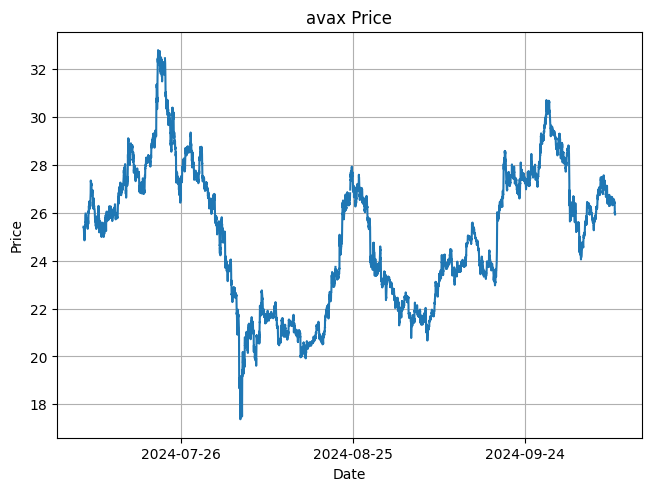

In [12]:
date = df["date"]

avax_reward_usd = df["avax_pending_rewards_usd"]
avax_reward_amount = df["avax_pending_rewards"]

avax_price = avax_reward_usd / avax_reward_amount

fig, ax = plt.subplots(1, 1, constrained_layout=True)

# Plot the data
ax.plot(date, avax_price)
ax.set_title("avax Price")
ax.set_xlabel("Date")
ax.set_ylabel("Price")

ax.grid(True)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

plt.show()